<a href="https://colab.research.google.com/github/winstonk6/data_analytics_winter_2022/blob/main/Python/COVID19_DATA_ANALYSIS_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [ ]:
df = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118883 entries, 0 to 2118882
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   county  object 
 2   state   object 
 3   fips    float64
 4   cases   int64  
 5   deaths  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 97.0+ MB


State and county files contain FIPS codes, a standard geographic identifier, to make it easier for an analyst to combine this data with other data sets like a map file or population data.

In [ ]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
states = df.groupby('date').sum()
states.drop('fips', axis=1, inplace=True)
states.tail()

,cases,deaths
date,,
2022-01-11,62370827,840597.0
2022-01-12,63251809,843357.0
2022-01-13,64124915,845588.0
2022-01-14,65058164,848568.0
2022-01-15,65476992,849566.0


[Text(0.5, 1.0, 'US Total Cases')]

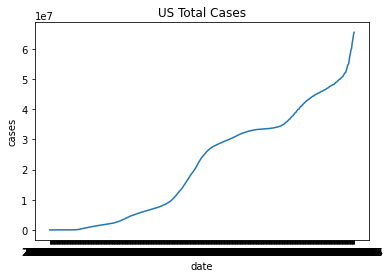

In [ ]:
us_cases_last30 = sns.lineplot(data=states, x='date', y='cases')
us_cases_last30.set(title="US Total Cases")

[Text(0.5, 1.0, 'US Total Deaths')]

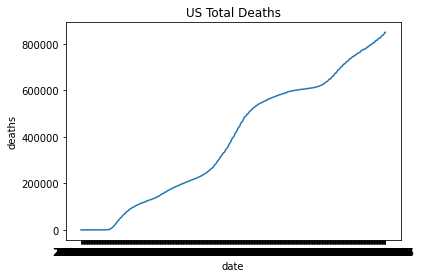

In [ ]:
us_deaths_last30 = sns.lineplot(data=states, x='date', y='deaths')
us_deaths_last30.set(title="US Total Deaths")

<Figure size 864x576 with 0 Axes>

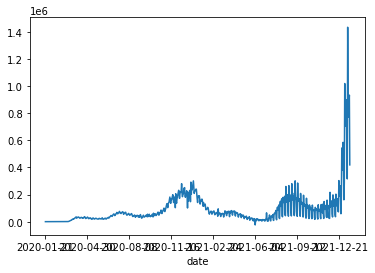

<Figure size 864x576 with 0 Axes>

In [ ]:
daily_cases = states['cases'].diff().plot(kind='line')

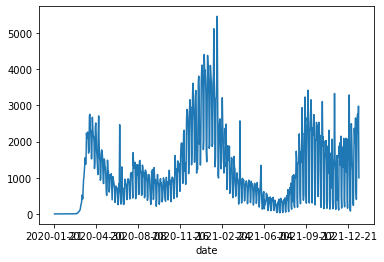

In [48]:
daily_deaths = states['deaths'].diff().plot(kind='line')

# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
ny = df[df['state'] == 'New York']
ny.head()

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
518,2020-03-04,New York City,New York,NaN,2,0.0
519,2020-03-04,Westchester,New York,36119.0,9,0.0


In [64]:
ny_df = ny_data.groupby('date').sum()
ny_df.drop('fips', axis=1, inplace=True)
ny_df.tail()

,cases,deaths
date,,
2022-01-11,4244155,60428.0
2022-01-12,4299066,60638.0
2022-01-13,4361115,60876.0
2022-01-14,4408467,61099.0
2022-01-15,4456337,61193.0


[Text(0.5, 1.0, 'NY Total Cases')]

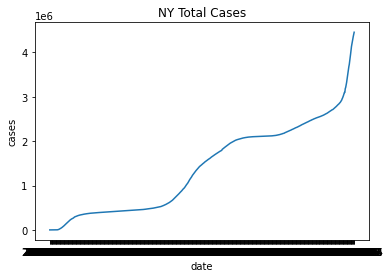

In [65]:
ny_total_cases = sns.lineplot(data=ny_df, x='date', y='cases')
ny_total_cases.set(title="NY Total Cases")

[Text(0.5, 1.0, 'NY Total Deaths')]

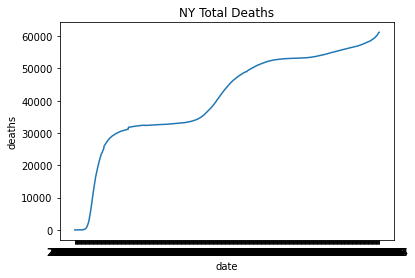

In [ ]:
ny_total_deaths = sns.lineplot(data=ny_df, x='date', y='deaths')
ny_total_deaths.set(title="NY Total Deaths")

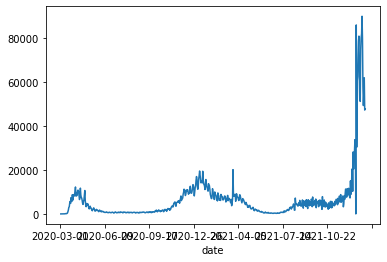

In [66]:
ny_daily_cases = ny_df['cases'].diff().plot(kind='line')

[Text(0.5, 1.0, 'NY Total Cases over last 30 days')]

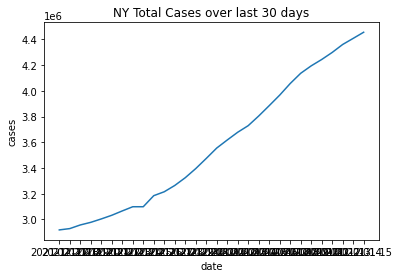

In [ ]:
ny_last_30_cases = sns.lineplot(data=ny_data_sum[-30:], x='date', y='cases')
ny_last_30_cases.set(title="NY Total Cases over last 30 days")

[Text(0.5, 1.0, 'NY Total Deaths over last 30 days')]

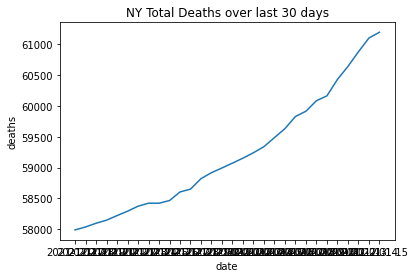

In [ ]:
ny_last_30_deaths = sns.lineplot(data=ny_data_sum[-30:], x='date', y='deaths')
ny_last_30_deaths.set(title="NY Total Deaths over last 30 days")

# Comparing Covid 19 data with different states

In [54]:
texas = df[df['state'] == 'Texas']
df_texas = texas.groupby('date').sum()
df_texas.drop('fips', axis=1, inplace=True)

<Figure size 432x288 with 0 Axes>

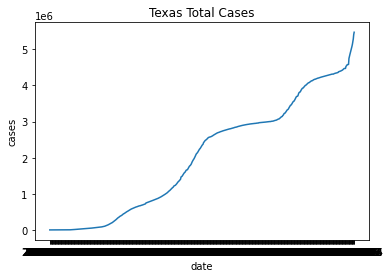

<Figure size 432x288 with 0 Axes>

In [55]:
texas_cases = sns.lineplot(data=df_texas, x='date', y='cases')
texas_cases.set(title="Texas Total Cases")
plt.figure()

<Figure size 432x288 with 0 Axes>

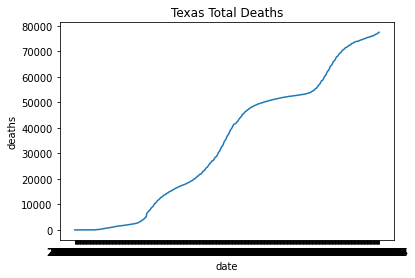

<Figure size 432x288 with 0 Axes>

In [57]:
texas_deaths = sns.lineplot(data=df_texas, x='date', y='deaths')
texas_deaths.set(title="Texas Total Deaths")
plt.figure()

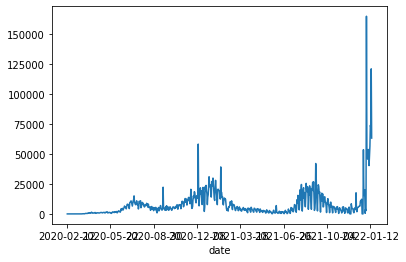

In [71]:
tx_daily_cases = df_texas['cases'].diff().plot(kind='line')

<Figure size 432x288 with 0 Axes>

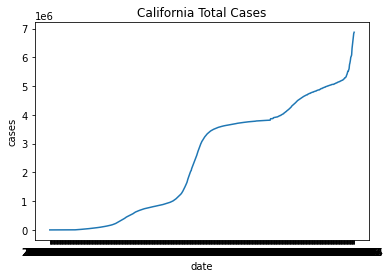

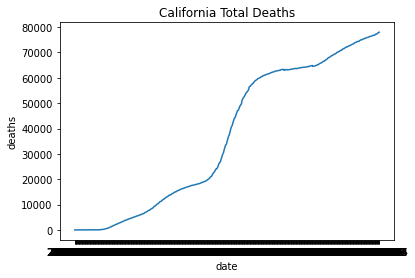

<Figure size 432x288 with 0 Axes>

In [58]:
california = df[df['state'] == 'California']
df_cali = california.groupby('date').sum()
df_cali.drop('fips', axis=1, inplace=True)

cali_cases = sns.lineplot(data=df_cali, x='date', y='cases')
cali_cases.set(title="California Total Cases")
plt.figure()

cali_cases = sns.lineplot(data=df_cali, x='date', y='deaths')
cali_cases.set(title="California Total Deaths")
plt.figure()

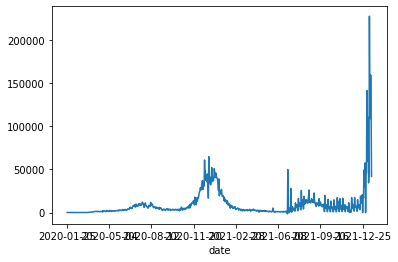

In [70]:
cali_daily_cases = df_cali['cases'].diff().plot(kind='line')

<Figure size 432x288 with 0 Axes>

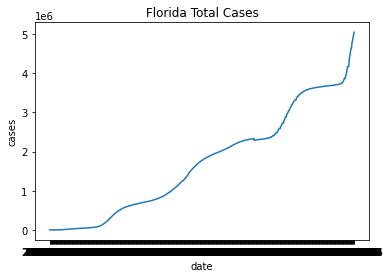

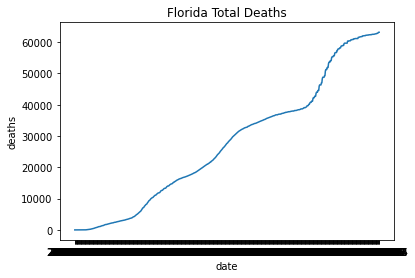

<Figure size 432x288 with 0 Axes>

In [63]:
florida = df[df['state'] == 'Florida']
df_flor = florida.groupby('date').sum()
df_flor.drop('fips', axis=1, inplace=True)

flor_cases = sns.lineplot(data=df_flor, x='date', y='cases')
flor_cases.set(title="Florida Total Cases")
plt.figure()

flor_cases = sns.lineplot(data=df_flor, x='date', y='deaths')
flor_cases.set(title="Florida Total Deaths")
plt.figure()

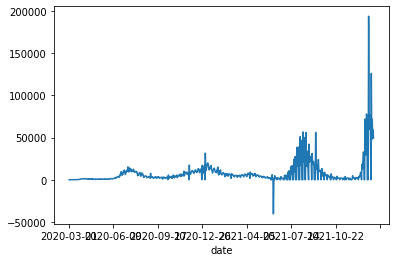

In [72]:
flor_daily_cases = df_flor['cases'].diff().plot(kind='line')

<Figure size 432x288 with 0 Axes>

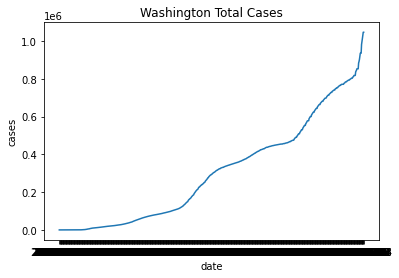

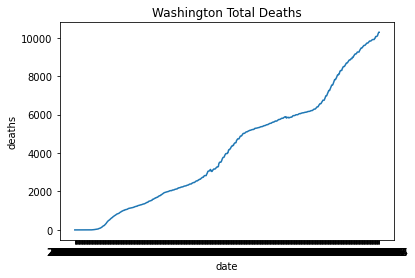

<Figure size 432x288 with 0 Axes>

In [67]:
washington = df[df['state'] == 'Washington']
df_wash = washington.groupby('date').sum()
df_wash.drop('fips', axis=1, inplace=True)

wash_cases = sns.lineplot(data=df_wash, x='date', y='cases')
wash_cases.set(title="Washington Total Cases")
plt.figure()

wash_cases = sns.lineplot(data=df_wash, x='date', y='deaths')
wash_cases.set(title="Washington Total Deaths")
plt.figure()

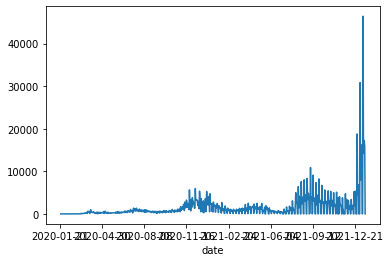

In [73]:
wash_daily_cases = df_wash['cases'].diff().plot(kind='line')

<Figure size 432x288 with 0 Axes>

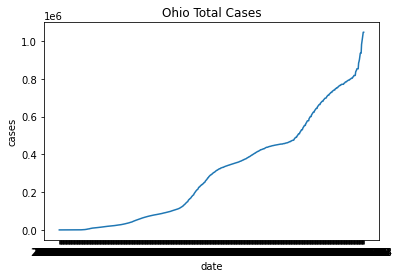

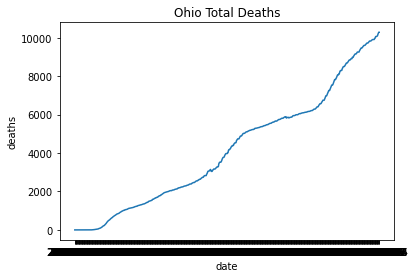

<Figure size 432x288 with 0 Axes>

In [69]:
ohio = df[df['state'] == 'ohio']
df_ohio = washington.groupby('date').sum()
df_ohio.drop('fips', axis=1, inplace=True)

ohio_cases = sns.lineplot(data=df_ohio, x='date', y='cases')
ohio_cases.set(title="Ohio Total Cases")
plt.figure()

wash_cases = sns.lineplot(data=df_ohio, x='date', y='deaths')
wash_cases.set(title="Ohio Total Deaths")
plt.figure()

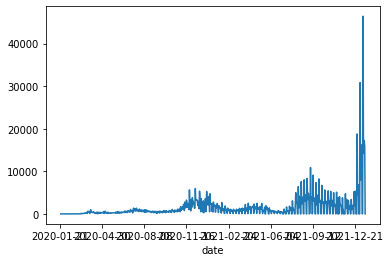

In [74]:
ohio_daily_cases = df_ohio['cases'].diff().plot(kind='line')

# Conclusion

Below are the conclusions:

1. All states have experienced a very large increase in cases recently.
2. The number of deaths has also increased recently, but not as dramatically as the number of cases.
3. New York experienced the largest number of cases and deaths initially, but eventually other states started to match or surpass NY in cases.

